In [1]:
import numpy as np
import pandas as pd
import xgboost as xgb
import psutil

In [2]:
from pandas.tseries.offsets import Day, Week

In [3]:
psutil.virtual_memory().available >> 30

147

In [4]:
data = pd.read_parquet('/main/data/MVideo_2/dataset_ft_5.parquet')

In [5]:
trans = pd.read_parquet('/main/data/MVideo_2/transactions_ft_5.parquet')

In [6]:
trans = trans[['STORE_ID', 'PRODUCT_ID', 'DATE', 'UNITS_SOLD']].copy()

In [7]:
trans.DATE.where(trans.DATE == ((trans.DATE + Week(weekday=6)) - Week()), trans.DATE + Week(weekday=6), inplace = True)

In [8]:
trans1 = trans.groupby(['STORE_ID', 'PRODUCT_ID', 'DATE']).sum().reset_index()

In [9]:
trans1.UNITS_SOLD = np.clip(trans1.UNITS_SOLD, 0, None)

In [10]:
trans1.DATE -= Day(7)

In [11]:
trans1[(trans1.UNITS_SOLD >= 0) & (trans1.UNITS_SOLD < 10)].UNITS_SOLD.hist()

In [12]:
data1 = pd.merge(data, trans1, how = 'left', on = ['STORE_ID', 'PRODUCT_ID', 'DATE'])

In [13]:
data1.fillna(0, inplace = True)

In [14]:
data1.rename(columns = {'UNITS_SOLD': 'UNITS_SOLD_P1'}, inplace = True)

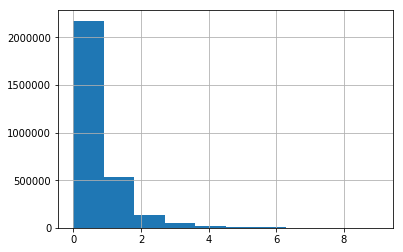

In [15]:
data1[data1.UNITS_SOLD_P1 < 10].UNITS_SOLD_P1.hist()

In [16]:
data1.STORE_ID = data1.STORE_ID.astype('str').str[1:].astype('int')

In [17]:
ifeat = ['REGULAR_SALES_PRICE_INCL_TAX', 'PRODUCT_ID', 'MAINCATEGORY_ID', 'SUBCATEGORY_ID', 'STORE_ID', 'REGION', 'INTERNET',
         'PROMOTIONS_AVAILABLE_W0', 'PROMOTIONS_AVAILABLE_W1', 'PROMOTIONS_AVAILABLE_W2', 'PROMOTIONS_AVAILABLE_W3',
         'PROMOTIONS_AVAILABLE_W4', 'PROMOTIONS_AVAILABLE_W5', 'PROMOTIONS_AVAILABLE_W6', 'PROMOTIONS_AVAILABLE_W7',
         'PROMOTIONS_AVAILABLE_W8', 'PROMOTIONS_AVAILABLE_P1', 'PROMOTIONS_AVAILABLE_DIFF_P1', 'WEEK(DATE)', 'MONTH(DATE)',
         'UNITS_SOLD_P1']

In [18]:
ffeat = [s for s in data1.columns if s not in ['DATE'] + ifeat]

In [19]:
data1[ifeat] = data1[ifeat].astype('int32')

In [20]:
data1[ffeat] = data1[ffeat].astype('float32')

In [21]:
data1.info(max_cols = 999)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2935729 entries, 0 to 2935728
Data columns (total 123 columns):
DATE                                           datetime64[ns]
REGULAR_SALES_PRICE_INCL_TAX                   int32
PRODUCT_ID                                     int32
MAINCATEGORY_ID                                int32
SUBCATEGORY_ID                                 int32
STORE_ID                                       int32
REGION                                         int32
INTERNET                                       int32
PROMOTIONS_AVAILABLE_W0                        int32
PROMOTIONS_AVAILABLE_W1                        int32
PROMOTIONS_AVAILABLE_W2                        int32
PROMOTIONS_AVAILABLE_W3                        int32
PROMOTIONS_AVAILABLE_W4                        int32
PROMOTIONS_AVAILABLE_W5                        int32
PROMOTIONS_AVAILABLE_W6                        int32
PROMOTIONS_AVAILABLE_W7                        int32
PROMOTIONS_AVAILABLE_W8      

In [22]:
del data, trans, trans1

In [23]:
lab = ['UNITS_SOLD_P1']

In [24]:
exc = ['REGULAR_SALES_PRICE_INCL_TAX', 'MAINCATEGORY_ID', 'SUBCATEGORY_ID', 'REGION', 'INTERNET', 'PROMOTIONS_AVAILABLE_W0',
       'PROMOTIONS_AVAILABLE_W1', 'PROMOTIONS_AVAILABLE_W2', 'PROMOTIONS_AVAILABLE_W3', 'PROMOTIONS_AVAILABLE_W4',
       'PROMOTIONS_AVAILABLE_W5', 'PROMOTIONS_AVAILABLE_W6', 'PROMOTIONS_AVAILABLE_W7', 'PROMOTIONS_AVAILABLE_W8',
       'PROMOTIONS_AVAILABLE_P1', 'PROMOTIONS_AVAILABLE_ABS_DIFF_MEAN_8', 'PROMOTIONS_AVAILABLE_DIFF_P1', 'WEEK(DATE)',
       'MONTH(DATE)', 'general.PERCENT_TRUE(holidays.HOLIDAY)', 'general.PERCENT_TRUE(holidays.HOLIDAY_SP)',
       'general.PERCENT_TRUE(holidays.HOLIDAY_P)', 'general.PERCENT_TRUE(holidays.HOLIDAY_SP_P)']

In [25]:
ind = ['STORE_ID', 'PRODUCT_ID','DATE']

In [26]:
feat = [s for s in data1.columns if s not in lab + exc + ind]

In [27]:
for i in feat:
    print(i)

sales.SUM(trans.UNITS_SOLD)
sales.SUM(trans.REVENUE_INCL_TAX)
sales.SUM(trans.UNITS_SOLD_NP)
sales.SUM(trans.UNITS_SOLD_P)
sales.SUM(trans.REVENUE_INCL_TAX_NP)
sales.SUM(trans.REVENUE_INCL_TAX_P)
sales.STD(trans.UNITS_SOLD)
sales.STD(trans.REVENUE_INCL_TAX)
sales.STD(trans.UNITS_SOLD_NP)
sales.STD(trans.UNITS_SOLD_P)
sales.STD(trans.REVENUE_INCL_TAX_NP)
sales.STD(trans.REVENUE_INCL_TAX_P)
sales.MAX(trans.UNITS_SOLD)
sales.MAX(trans.REVENUE_INCL_TAX)
sales.MAX(trans.UNITS_SOLD_NP)
sales.MAX(trans.UNITS_SOLD_P)
sales.MAX(trans.REVENUE_INCL_TAX_NP)
sales.MAX(trans.REVENUE_INCL_TAX_P)
sales.MIN(trans.UNITS_SOLD)
sales.MIN(trans.REVENUE_INCL_TAX)
sales.MIN(trans.UNITS_SOLD_NP)
sales.MIN(trans.UNITS_SOLD_P)
sales.MIN(trans.REVENUE_INCL_TAX_NP)
sales.MIN(trans.REVENUE_INCL_TAX_P)
store.SUM(trans.UNITS_SOLD)
store.SUM(trans.REVENUE_INCL_TAX)
store.SUM(trans.UNITS_SOLD_NP)
store.SUM(trans.UNITS_SOLD_P)
store.SUM(trans.REVENUE_INCL_TAX_NP)
store.SUM(trans.REVENUE_INCL_TAX_P)
store.STD(trans.UNIT

In [28]:
for i in range(1, 9):
    tdata = data1[ind + feat].copy()
    tdata.DATE += pd.Timedelta(str(7 * i) + ' days')
    di = {}
    for j in feat:
        di[j] = j + '_W' + str(i)
    tdata.rename(columns = di, inplace = True)
    data1 = pd.merge(data1, tdata, how = 'left', on = ind)
    print(i)

1
2
3
4
5
6
7
8


In [30]:
hol = data1[['DATE', 'general.PERCENT_TRUE(holidays.HOLIDAY)', 'general.PERCENT_TRUE(holidays.HOLIDAY_SP)']].drop_duplicates()

In [33]:
for i in range(1, 9):
    tdata = hol.copy()
    tdata.DATE += pd.Timedelta(str(7 * i) + ' days')
    di = {}
    for j in ['general.PERCENT_TRUE(holidays.HOLIDAY)', 'general.PERCENT_TRUE(holidays.HOLIDAY_SP)']:
        di[j] = j + '_W' + str(i)
    tdata.rename(columns = di, inplace = True)
    data1 = pd.merge(data1, tdata, how = 'left', on = ['DATE'])
    print(i)

1
2
3
4
5
6
7
8


In [34]:
data1 = data1[~data1['general.PERCENT_TRUE(holidays.HOLIDAY)_W8'].isnull()].copy()

In [36]:
data1.fillna(0, inplace = True)

In [37]:
di = {}
for j in feat:
    di[j] = j + '_W0'
data1.rename(columns = di, inplace = True)

In [38]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2831698 entries, 3 to 2935728
Columns: 907 entries, DATE to general.PERCENT_TRUE(holidays.HOLIDAY_SP)_W8
dtypes: datetime64[ns](1), float32(885), int32(21)
memory usage: 9.6 GB


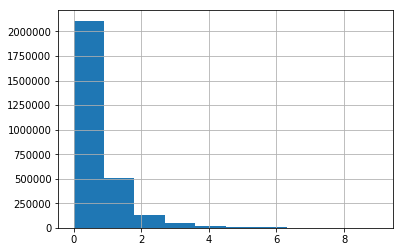

In [39]:
data1[data1.UNITS_SOLD_P1 < 10].UNITS_SOLD_P1.hist()

In [40]:
data1.to_parquet('/main/data/MVideo_2/temp_5_1.parquet')

In [41]:
del hol

In [42]:
#data1 = pd.read_parquet('/main/data/MVideo_2/temp_5_1.parquet')

In [43]:
li = {}
for i in range(3):
    li[i] = []
for i in range(8):
    for j in feat:
        li[0].append(j + '_DIFF_W' + str(i))
        li[1].append(j + '_W' + str(i))
        li[2].append(j + '_W' + str(i + 1))
data2 = pd.DataFrame(data = data1[li[1]].values - data1[li[2]].values, index = data1.index, columns = li[0])

In [44]:
data1 = data1.join(data2)

In [45]:
data1.info(max_cols = 9999)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2831698 entries, 3 to 2935728
Data columns (total 1675 columns):
DATE                                               datetime64[ns]
REGULAR_SALES_PRICE_INCL_TAX                       int32
PRODUCT_ID                                         int32
MAINCATEGORY_ID                                    int32
SUBCATEGORY_ID                                     int32
STORE_ID                                           int32
REGION                                             int32
INTERNET                                           int32
PROMOTIONS_AVAILABLE_W0                            int32
PROMOTIONS_AVAILABLE_W1                            int32
PROMOTIONS_AVAILABLE_W2                            int32
PROMOTIONS_AVAILABLE_W3                            int32
PROMOTIONS_AVAILABLE_W4                            int32
PROMOTIONS_AVAILABLE_W5                            int32
PROMOTIONS_AVAILABLE_W6                            int32
PROMOTIONS_AVAILABLE_

In [46]:
del data2

In [47]:
data1.to_parquet('/main/data/MVideo_2/temp_5_1.parquet')

In [32]:
#data1 = pd.read_parquet('/main/data/MVideo_2/temp_5_1.parquet')

In [33]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2831698 entries, 3 to 2935728
Columns: 1675 entries, DATE to category.MIN(trans.REVENUE_INCL_TAX_P)_DIFF_W7
dtypes: datetime64[ns](1), float32(1653), int32(21)
memory usage: 17.7 GB


In [34]:
psutil.virtual_memory().available >> 30

98

In [35]:
for i in [2, 4, 8]:
    for j in feat:
        tmpstr = j + '_W'
        tmpli = np.core.defchararray.add(tmpstr, np.arange(i).astype(np.str))
        tmp = data1[tmpli]
        data1[j + '_MEAN_' + str(i)] = tmp.mean(axis = 1)
        data1[j + '_MEAN_DECAY_' + str(i)] = (tmp.mul(np.power(0.99, np.arange(i)), axis = 1).sum(axis = 1) /
                                                 sum(np.power(0.99, np.arange(i))))
        data1[j + '_MEDIAN_' + str(i)] = tmp.median(axis = 1)
        data1[j + '_MIN_' + str(i)] = tmp.min(axis = 1)
        data1[j + '_MAX_' + str(i)] = tmp.max(axis = 1)
        data1[j + '_STD_' + str(i)] = tmp.std(axis = 1)
    print(i)
    #data1.to_parquet('/main/data/MVideo_2/temp_5_1.parquet')

2
4
8


In [36]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2831698 entries, 3 to 2935728
Columns: 3403 entries, DATE to category.MIN(trans.REVENUE_INCL_TAX_P)_STD_8
dtypes: datetime64[ns](1), float32(3381), int32(21)
memory usage: 35.9 GB


In [37]:
data1.to_parquet('/main/data/MVideo_2/temp_5_1.parquet')

In [27]:
data1 = pd.read_parquet('/main/data/MVideo_2/temp_5_1.parquet')

In [28]:
psutil.virtual_memory().available >> 30

106

In [29]:
for i in [2, 4, 8]:
    for j in feat:
        tmpstr = j + '_DIFF_W'
        tmpli = np.core.defchararray.add(tmpstr, np.arange(i).astype(np.str))
        tmp = data1[tmpli]
        data1[j + '_DIFF_MEAN_' + str(i)] = tmp.mean(axis = 1)
    print(i)

2
4
8


In [30]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2831698 entries, 3 to 2935728
Columns: 3691 entries, DATE to category.MIN(trans.REVENUE_INCL_TAX_P)_DIFF_MEAN_8
dtypes: datetime64[ns](1), float32(3669), int32(21)
memory usage: 39.0 GB


In [31]:
data1.to_parquet('/main/data/MVideo_2/temp_5_1.parquet')

In [ ]:
#data1 = pd.read_parquet('/main/data/MVideo_2/temp_5_1.parquet')

In [32]:
data1.isnull().sum().sum()

0

In [33]:
col = list(data1.columns)

In [34]:
feat = ([s for s in data1.columns if 'sales' in s] +
        [s for s in data1.columns if 'store' in s] +
        [s for s in data1.columns if 'product' in s] +
        [s for s in data1.columns if 'category' in s])

In [36]:
rest = [s for s in col if s not in feat]

In [37]:
rest

['DATE',
 'REGULAR_SALES_PRICE_INCL_TAX',
 'PRODUCT_ID',
 'MAINCATEGORY_ID',
 'SUBCATEGORY_ID',
 'STORE_ID',
 'REGION',
 'INTERNET',
 'PROMOTIONS_AVAILABLE_W0',
 'PROMOTIONS_AVAILABLE_W1',
 'PROMOTIONS_AVAILABLE_W2',
 'PROMOTIONS_AVAILABLE_W3',
 'PROMOTIONS_AVAILABLE_W4',
 'PROMOTIONS_AVAILABLE_W5',
 'PROMOTIONS_AVAILABLE_W6',
 'PROMOTIONS_AVAILABLE_W7',
 'PROMOTIONS_AVAILABLE_W8',
 'PROMOTIONS_AVAILABLE_P1',
 'PROMOTIONS_AVAILABLE_ABS_DIFF_MEAN_8',
 'PROMOTIONS_AVAILABLE_DIFF_P1',
 'WEEK(DATE)',
 'MONTH(DATE)',
 'general.PERCENT_TRUE(holidays.HOLIDAY)',
 'general.PERCENT_TRUE(holidays.HOLIDAY_SP)',
 'general.PERCENT_TRUE(holidays.HOLIDAY_P)',
 'general.PERCENT_TRUE(holidays.HOLIDAY_SP_P)',
 'UNITS_SOLD_P1',
 'general.PERCENT_TRUE(holidays.HOLIDAY)_W1',
 'general.PERCENT_TRUE(holidays.HOLIDAY_SP)_W1',
 'general.PERCENT_TRUE(holidays.HOLIDAY)_W2',
 'general.PERCENT_TRUE(holidays.HOLIDAY_SP)_W2',
 'general.PERCENT_TRUE(holidays.HOLIDAY)_W3',
 'general.PERCENT_TRUE(holidays.HOLIDAY_SP)_W3

In [40]:
fl = np.load('/main/data/MVideo_2/fl3.npy')

In [44]:
hist = [s for s in data1.columns if 'sales.SUM(trans.UNITS_SOLD)' in s]

In [49]:
ar = np.unique(np.array(rest + list(fl) + hist))

In [53]:
data1 = data1[ar]

In [55]:
data1.head()

,DATE,INTERNET,MAINCATEGORY_ID,MONTH(DATE),PRODUCT_ID,PROMOTIONS_AVAILABLE_ABS_DIFF_MEAN_8,PROMOTIONS_AVAILABLE_DIFF_P1,PROMOTIONS_AVAILABLE_P1,PROMOTIONS_AVAILABLE_W0,PROMOTIONS_AVAILABLE_W1,...,sales.SUM(trans.UNITS_SOLD)_W5,sales.SUM(trans.UNITS_SOLD)_W6,sales.SUM(trans.UNITS_SOLD)_W7,sales.SUM(trans.UNITS_SOLD)_W8,store.MAX(trans.REVENUE_INCL_TAX)_W8,store.MAX(trans.UNITS_SOLD)_MEAN_8,store.SUM(trans.REVENUE_INCL_TAX)_W5,store.SUM(trans.UNITS_SOLD)_MEAN_DECAY_4,store.SUM(trans.UNITS_SOLD_P)_MEDIAN_4,store.SUM(trans.UNITS_SOLD_P)_MIN_2
index,,,,,,,,,,,,,,,,,,,,,
3,2016-09-04,0,107,9,10007755,0.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.500,0.0,51.749088,33.5,39.0
4,2016-09-11,0,107,9,10007755,0.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.625,0.0,49.791344,33.5,27.0
5,2016-09-18,0,107,9,10007755,0.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.750,1751447.0,51.256119,33.0,27.0
6,2016-09-25,0,107,9,10007755,0.0,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.875,1288187.0,59.578346,31.5,27.0
7,2016-10-02,0,107,10,10007755,0.0,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,1.000,1440009.0,60.070122,31.0,35.0


In [54]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2831698 entries, 3 to 2935728
Columns: 115 entries, DATE to store.SUM(trans.UNITS_SOLD_P)_MIN_2
dtypes: datetime64[ns](1), float32(93), int32(21)
memory usage: 1.2 GB


In [56]:
data1.to_parquet('/main/data/MVideo_2/dataset_main_5_0.parquet')